# Projet 5 - Produisez une étude de marché

## Partie I - Importation des données

### Importation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import P5_03_OCR5 as OCR

from scipy.cluster.hierarchy import linkage, fcluster, cophenet, dendrogram

from sklearn import preprocessing
from sklearn import decomposition

from scipy.spatial.distance import pdist

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

sns.set(color_codes = True)
#sns.set(style="whitegrid")

In [2]:
_FONTSIZE_ = 18
_FONTSIZETITLE_ = 24

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

### Nettoyer des données

In [3]:
df_data_raw = pd.read_csv('./Data/data_raw.csv',encoding = "ISO-8859-1")

Nous enlevons les données concernants une nsemble de pays (Code Zone supérieur à 5000)

In [4]:
df_data = df_data_raw[~(df_data_raw['Code zone'] >= 5000)]

Nous enlevons la Chine qui corresponds à un autre ensemble de pays (Code Zone : 351)

In [5]:
df_data = df_data[~(df_data['Code zone'] == 351)]

### Préparation du tableau

In [6]:
codeElementAGarder = [511, 664, 674]
codeProduitAGarder = [2501, 2901, 2941]

In [7]:
df_data_cleaned = df_data.copy()

In [8]:
df_data_cleaned = df_data[df_data['Code Produit'].isin(codeProduitAGarder)]
df_data_cleaned = df_data_cleaned[df_data_cleaned['Code Élément'].isin(codeElementAGarder)]

In [9]:
df_data_cleaned['Difference de population'] = df_data_cleaned['Y2017'] / df_data_cleaned['Y2014'] * 100

In [10]:
df_data_cleaned = OCR.ligneToColonne(df_data_cleaned, [2901, 664, 'Disponibilité alimentaire Kcal'])
df_data_cleaned = OCR.ligneToColonne(df_data_cleaned, [2901, 674, 'Disponibilité alimentaire Protéine'])
df_data_cleaned = OCR.ligneToColonne(df_data_cleaned, [2941, 674, 'Proportion Protéine Animale'])

In [11]:
df_data_cleaned['Proportion Protéine Animale'] /= df_data_cleaned['Disponibilité alimentaire Protéine']

In [12]:
filt = df_data_cleaned['Code Élément'] == 511
colonne = ['Zone', 'Difference de population', 'Disponibilité alimentaire Kcal', 'Disponibilité alimentaire Protéine', 'Proportion Protéine Animale']
df_data_cleaned = df_data_cleaned.loc[filt, colonne]

In [13]:
df_data_cleaned

,Zone,Difference de population,Disponibilité alimentaire Kcal,Disponibilité alimentaire Protéine,Proportion Protéine Animale
0,Afghanistan,108.766110,2000.0,54.09,0.195045
5,Afrique du Sud,104.520316,2994.0,83.41,0.414339
10,Albanie,99.581190,3400.0,119.55,0.554914
15,Algérie,106.334189,3349.0,92.91,0.276719
20,Allemagne,101.483148,3556.0,104.20,0.605374
...,...,...,...,...,...
835,Venezuela (République bolivarienne du),97.868087,2247.0,56.28,0.450782
840,Viet Nam,103.147616,2938.0,90.03,0.408864
845,Yémen,107.788761,2063.0,53.23,0.200263
850,Zambie,109.440453,2013.0,59.09,0.197834


## Partie II - Réalisation du dendogramme

### Importation des données nettoyés

In [14]:
data = pd.read_csv('./Export/data.csv', index_col = 0)

In [15]:
data

,Difference de population,Disponibilité alimentaire Kcal,Disponibilité alimentaire Protéine,Proportion Protéine Animale
Zone,,,,
Afghanistan,8.059596,2000.0,54.09,0.195045
Afrique du Sud,4.324821,2994.0,83.41,0.414339
Albanie,-0.420572,3400.0,119.55,0.554914
Algérie,5.956869,3349.0,92.91,0.276719
Allemagne,1.461473,3556.0,104.20,0.605374
...,...,...,...,...
Venezuela (République bolivarienne du),-2.178354,2247.0,56.28,0.450782
Viet Nam,3.051565,2938.0,90.03,0.408864
Yémen,7.225949,2063.0,53.23,0.200263


### Préparation des données - Centrage et Réduction

In [16]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# generate the linkage matrix
Z = linkage(X_scaled, 'ward')

### Cophenetic correlation

In [17]:
c, coph_dists = cophenet(Z, pdist(data))
f"Cophenetic correlation : {c:0.2f}"

'Cophenetic correlation : 0.49'

La correlation est assez loin de 1, ce qui signifie que la distance euclidienne entre deux points et entre noeuds du dendrogramme pour ces mêmes points ne sont pas assez corrélées.

In [18]:
# generate the linkage matrix
Z = linkage(X_scaled, 'complete')

In [19]:
c, coph_dists = cophenet(Z, pdist(data))
f"Cophenetic correlation : {c:0.2f}"

'Cophenetic correlation : 0.54'

En utilisant ma méthode 'complete' nous obtenons une meilleure corélation : 

d(u, v) = \max(dist(u[i],v[j]))

pour tous points i dans le cluster u et j dans le cluster v. il est également connu comme Farthest Point Algorithm ou Voor Hees Algorithm.

### Courbe de Lorenz

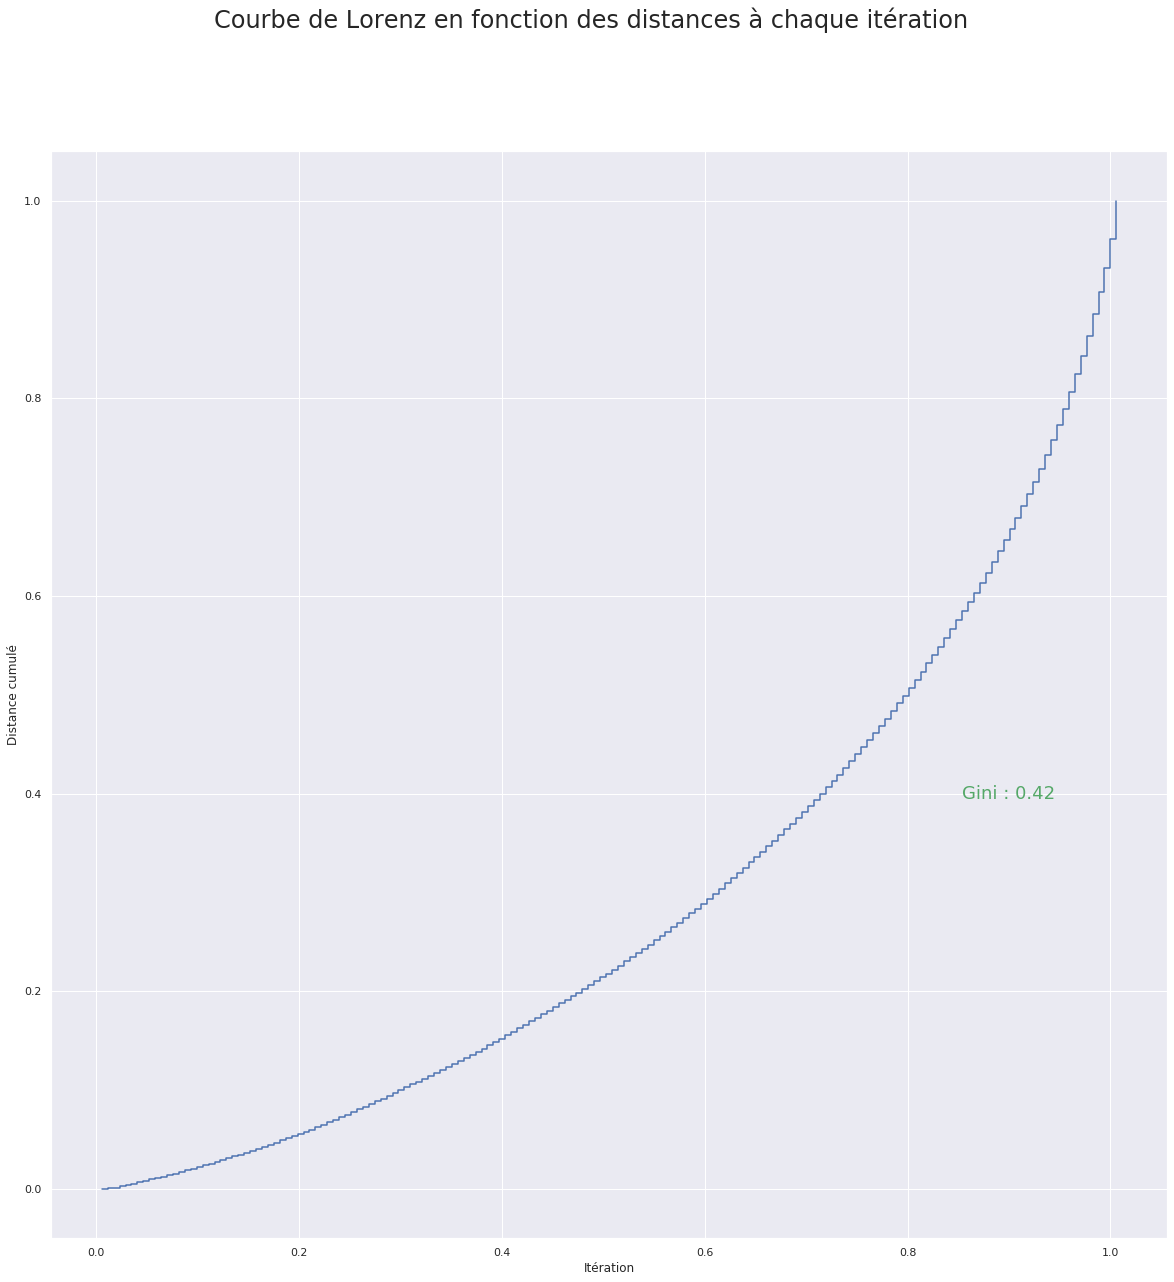

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

fig.suptitle("Courbe de Lorenz en fonction des distances à chaque itération", fontsize= _FONTSIZETITLE_)

lorenz, n, gini = OCR.lorenz(pd.DataFrame(data=Z[:,2]))
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes.plot(xaxis,lorenz,drawstyle='steps-post')
axes.text(0.9, 0.4, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes.set_xlabel('Itération')
axes.set_ylabel('Distance cumulé')

plt.show()

Avec la méthode 'complete', nous avons un coefficient de Gini plus faible qu'avec la méthode 'Ward' (Coefficient de Gini = 0.54)

### Dendrogramme

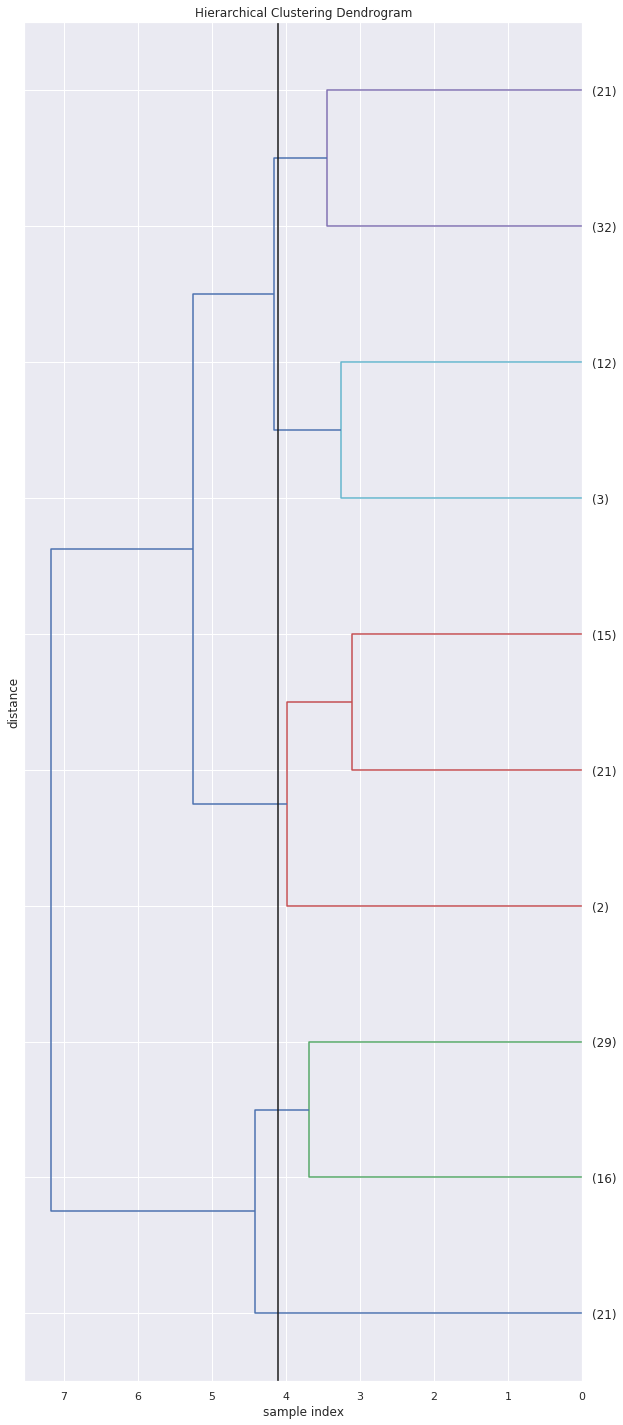

In [21]:
# Affichage du dendrogramme tronqué
plt.figure(figsize=(10,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=4.1, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 4.1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

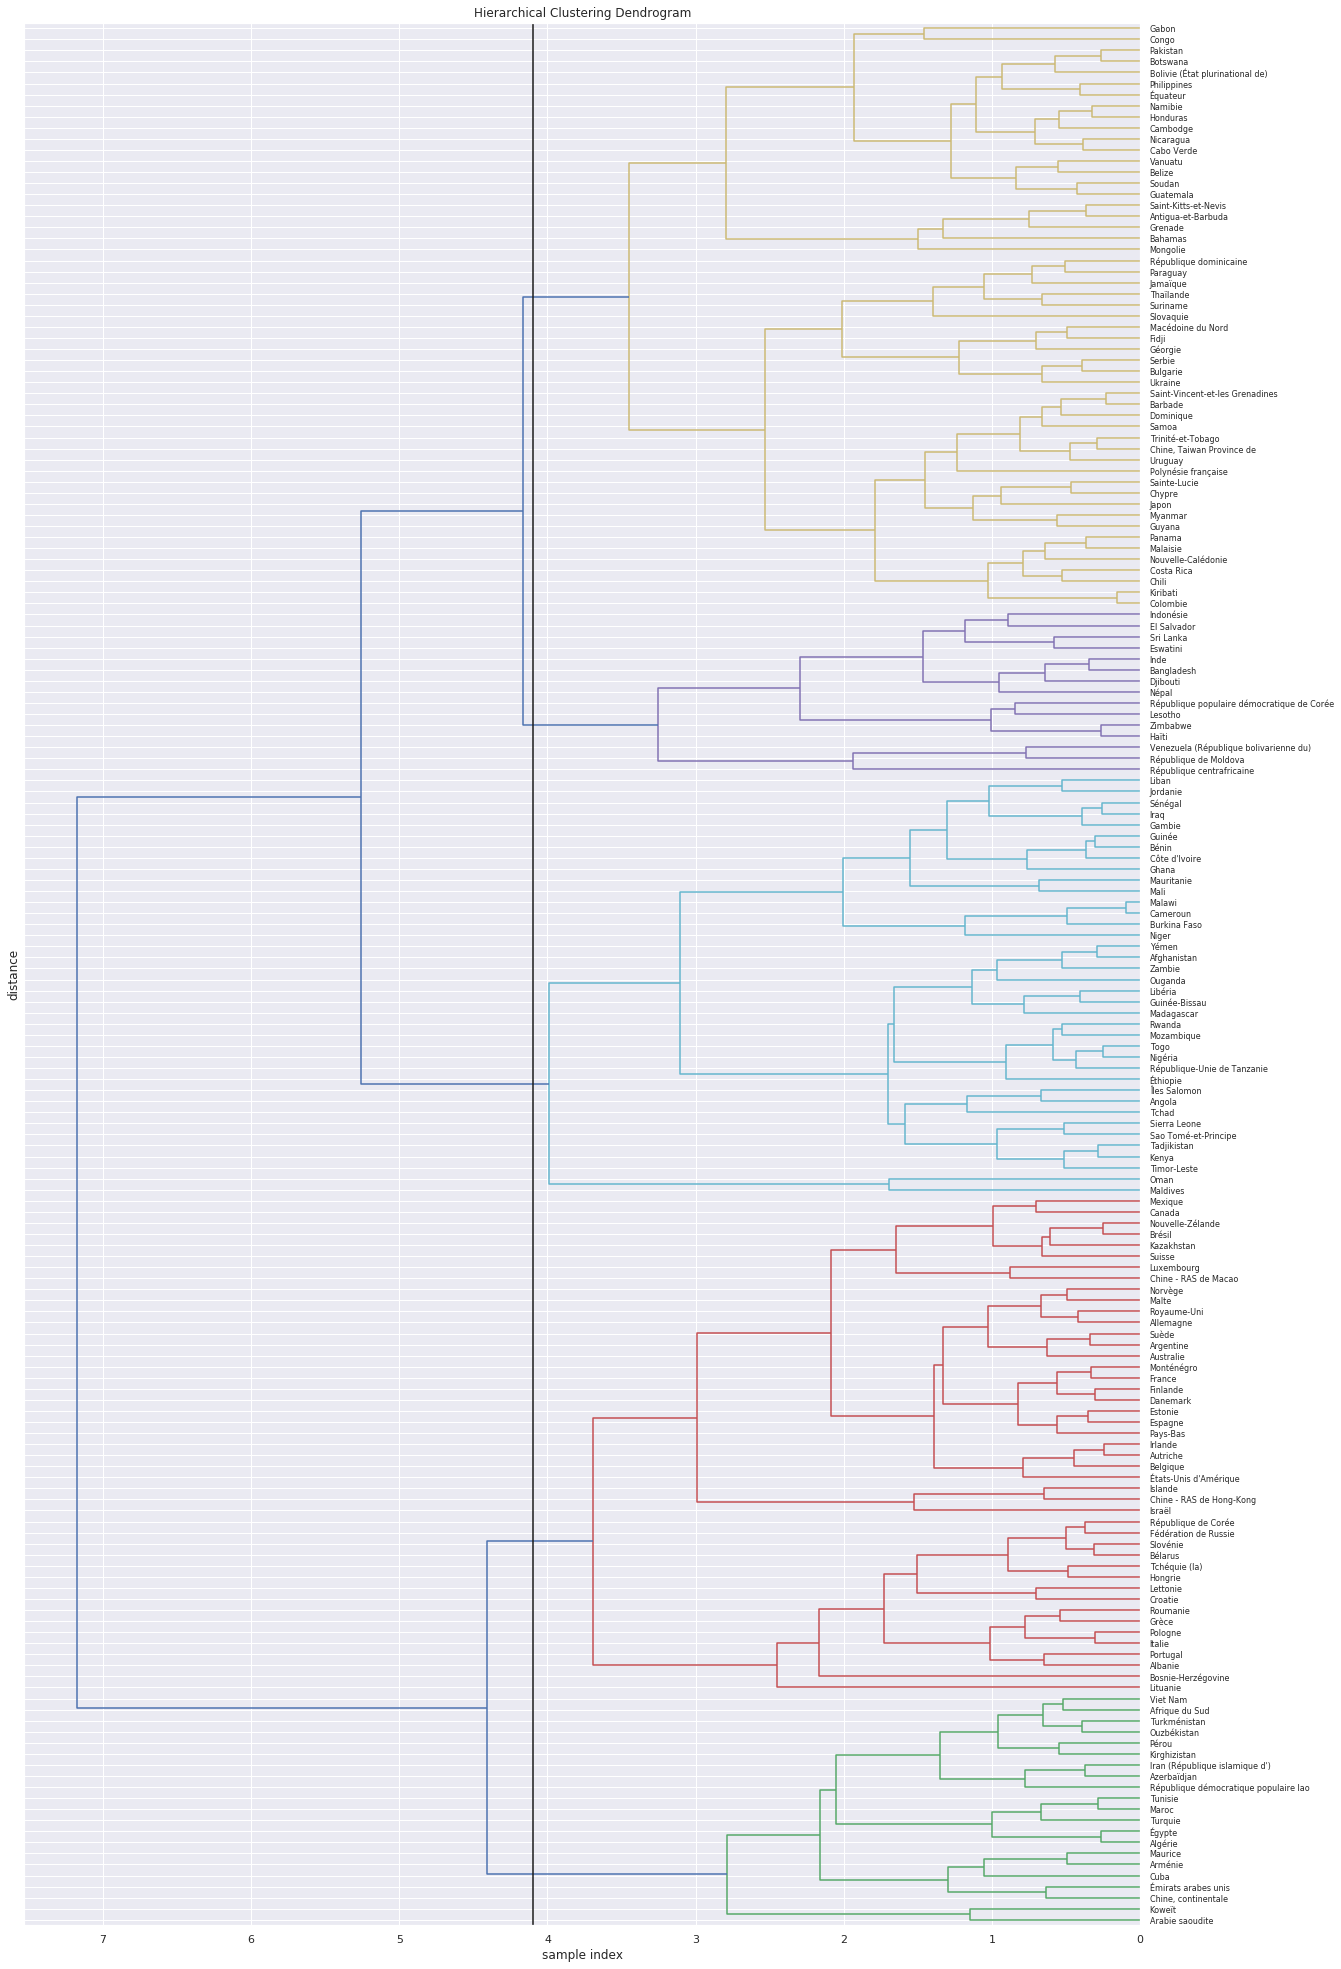

In [22]:
# Affichage du dendrogramme complet
plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=4.1, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 4.1,
    leaf_font_size = 8
)
plt.show()

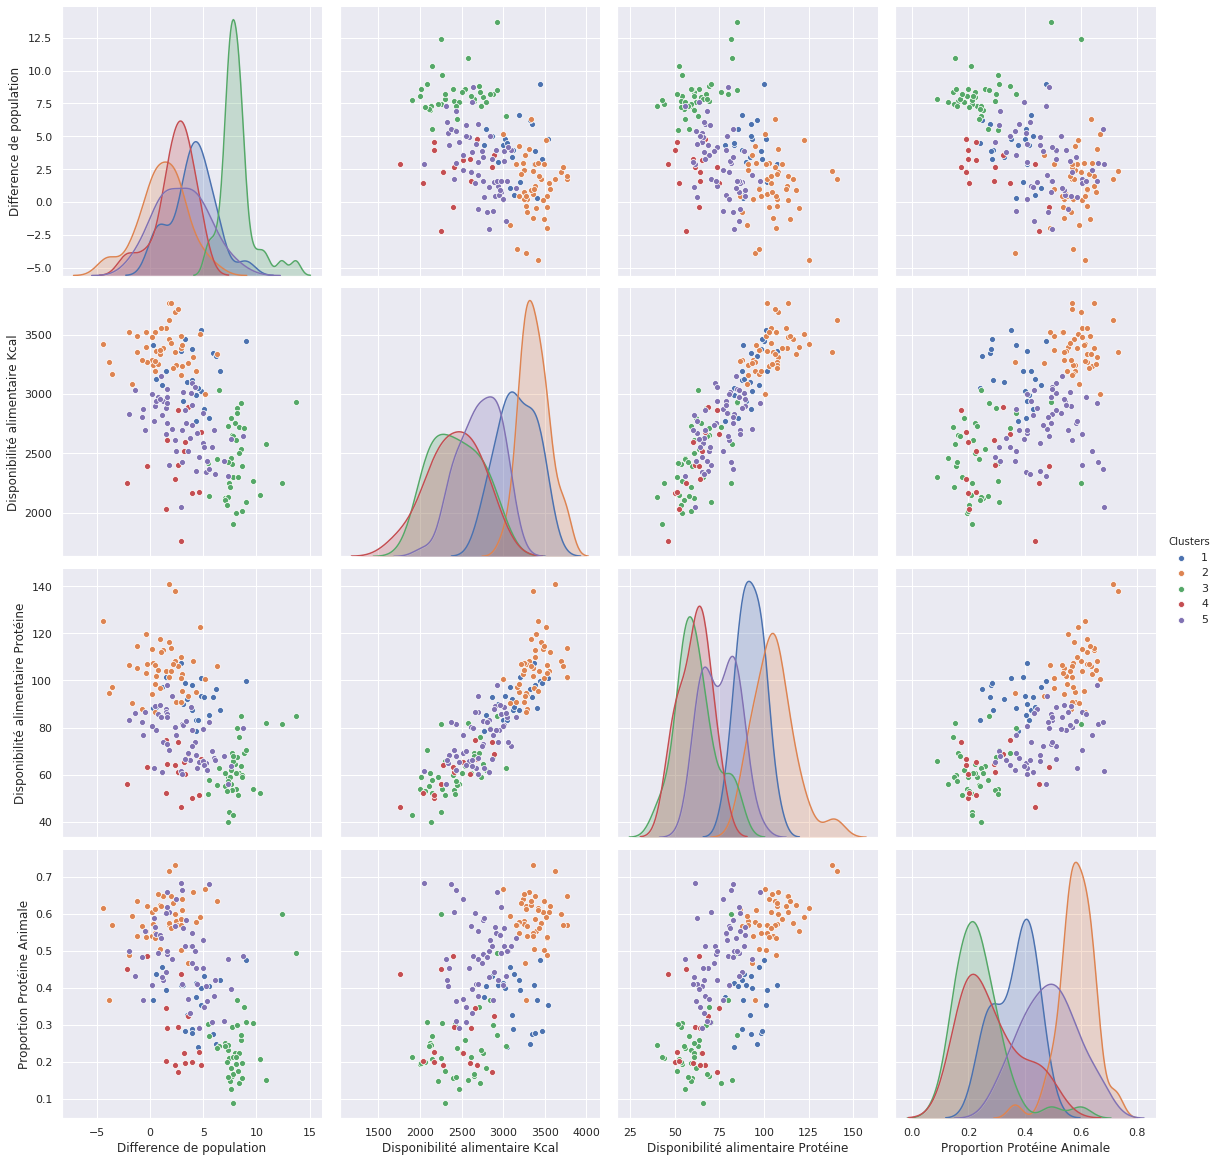

In [23]:
df = pd.DataFrame(data=X)
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]
df['Clusters'] = fcluster(Z, 5, criterion='maxclust')
sns.pairplot(df, hue='Clusters', height=4)

Nous voyons que : 
 * le cluster 1 - en bleu - est en croissance démographique modéré, avec une disponibilité alimentaire convenable.
 * le cluster 2 - en orange - a une croissance démographique faible et une proportion de protéine alimentaire forte
 * le cluster 3 - en vert - est en croissance démographique forte et une proportion de protéine alimentaire faible 
 * le cluster 4 - en rouge - a une croissance démographique modérée et une proportion de protéine alimentaire faible
 * le cluster 5 - en violet - est en croissance démographique faible avec une proportion de protéine alimentaire élevée 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

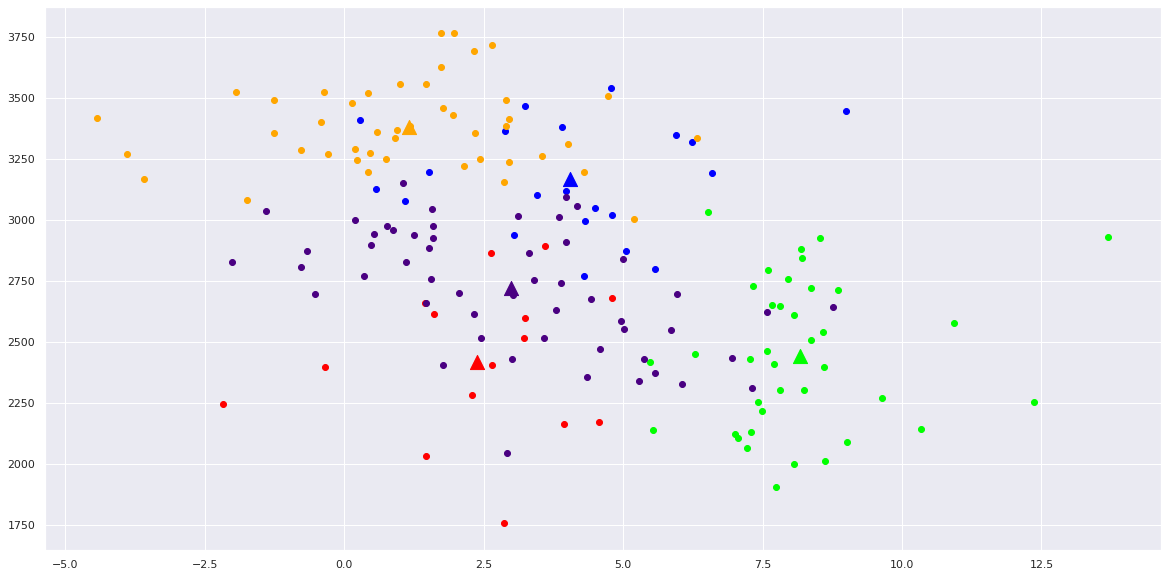

In [24]:
fig = plt.figure(figsize=(20,10))
        
color1=[0, 0, 1, 1]
color2=[1, 0.65, 0, 1]
color3=[0, 1, 0, 1]
color4=[1, 0, 0, 1]
color5=[0.29, 0, 0.51, 1]

colormap = np.array([color1, color2, color3, color4, color5])

# affichage des points
for i in range(1,6):
    plt.scatter(df[df['Clusters'] == i].iloc[:, 0], df[df['Clusters'] == i].iloc[:, 1], c = colormap[i-1])
    meanD1 = df[df['Clusters'] == i].iloc[:, 0].mean()
    meanD2 = df[df['Clusters'] == i].iloc[:, 1].mean()
    plt.scatter(meanD1, meanD2, marker = '^', s = 200, c = colormap[i-1])
    
plt.show()

### Calcul de correlation

In [25]:
for i in range(len(df.columns)-1):
    for j in range(i+1, len(df.columns)-1):
        statp, pp = pearsonr(df.iloc[:,i], df.iloc[:,j])
        stats, ps = spearmanr(df.iloc[:,i], df.iloc[:,j])
        print('corrélation entre', df.columns[i], 'et', df.columns[j])
        print('Pearson : stat=%.3f, p=%.3f' % (statp, pp))
        print('Spearman : stat=%.3f, p=%.3f' % (stats, ps))
        if pp > 0.05:
            print('Probably independent following Pearson Test')
        else:
            print('Probably dependent following Pearson Test')
            
        if ps > 0.05:
            print('Probably independent following Spearman Test\n')
        else:
            print('Probably dependent following Spearman Test\n')

corrélation entre Difference de population et Disponibilité alimentaire Kcal
Pearson : stat=-0.491, p=0.000
Spearman : stat=-0.510, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Disponibilité alimentaire Protéine
Pearson : stat=-0.496, p=0.000
Spearman : stat=-0.524, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Proportion Protéine Animale
Pearson : stat=-0.559, p=0.000
Spearman : stat=-0.573, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Disponibilité alimentaire Kcal et Disponibilité alimentaire Protéine
Pearson : stat=0.879, p=0.000
Spearman : stat=0.897, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Disponibilité alimentaire Kcal et Proportion Protéine Animale
Pearson

## Partie III - Réalisation du ACP

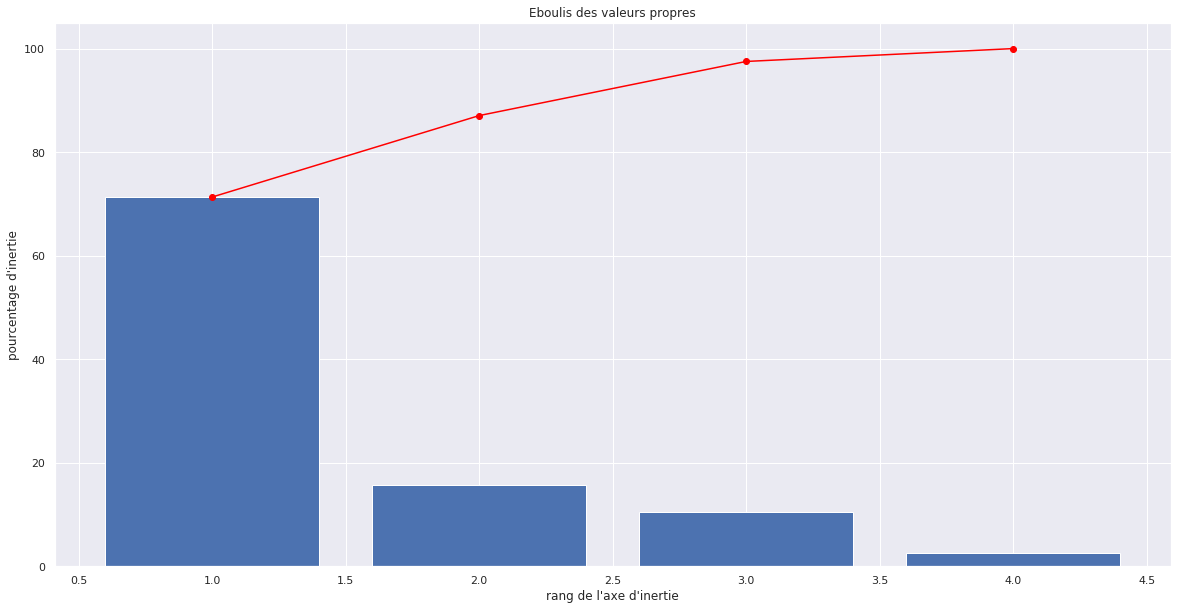

In [26]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]]

# préparation des données pour l'ACP
X = data_pca.values
names = df.index #pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

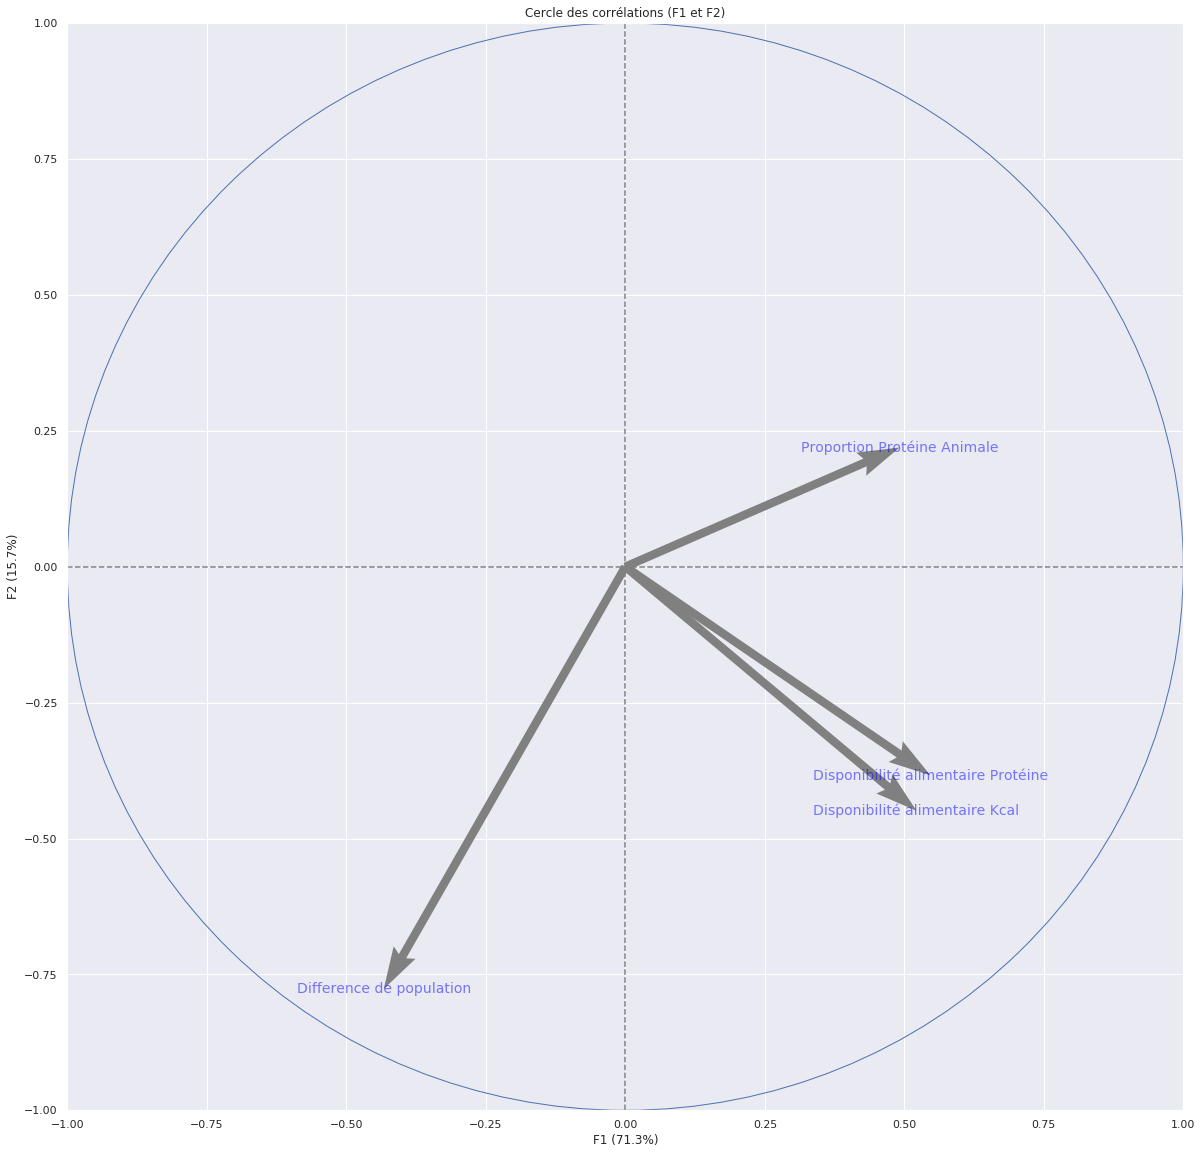

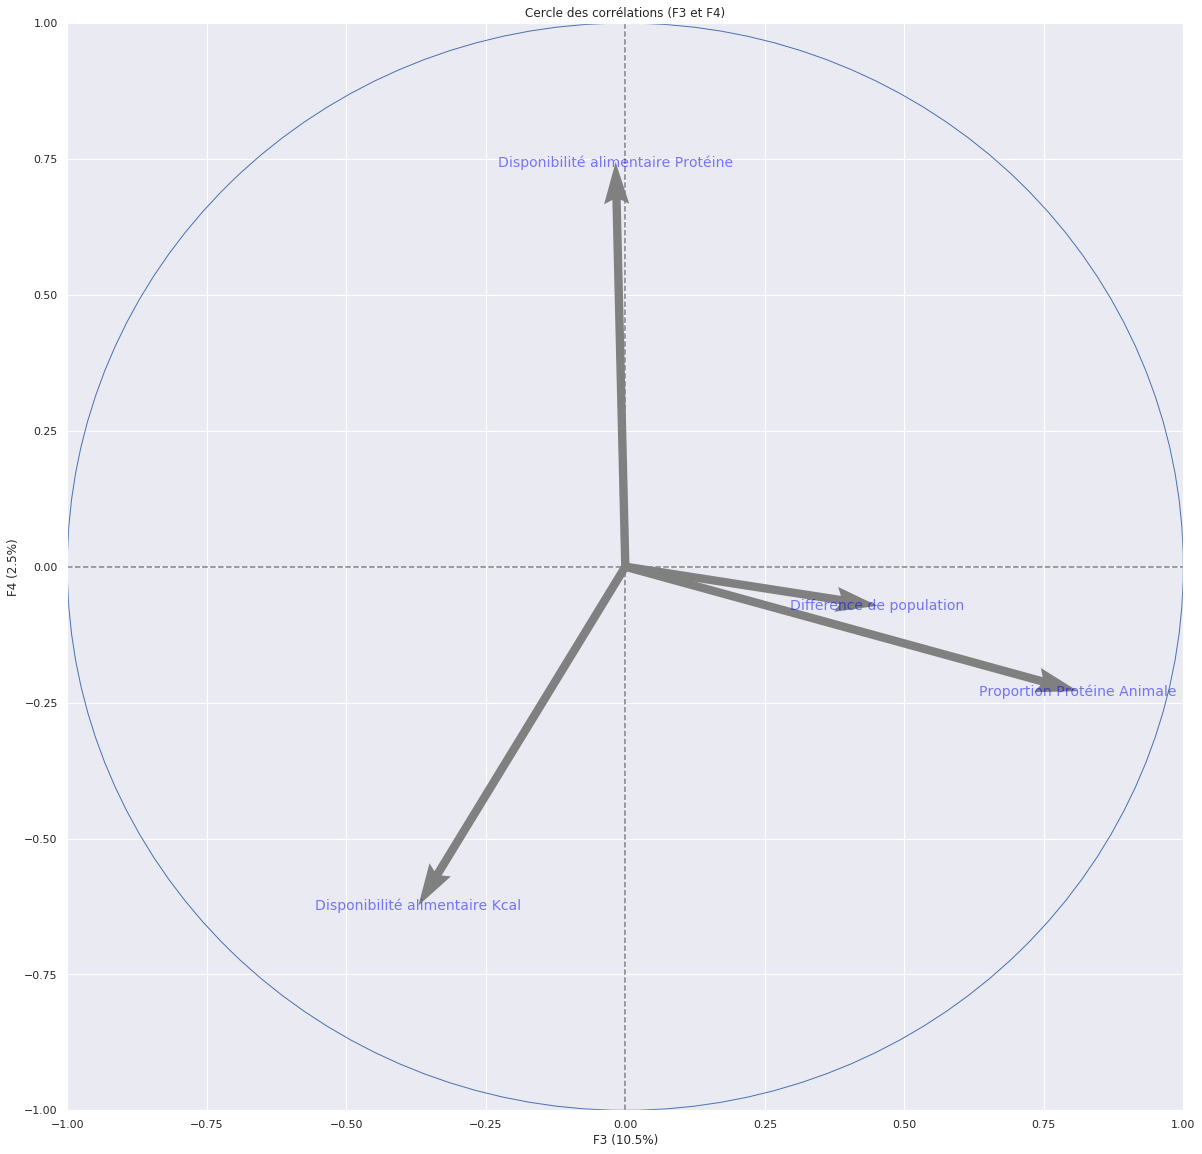

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

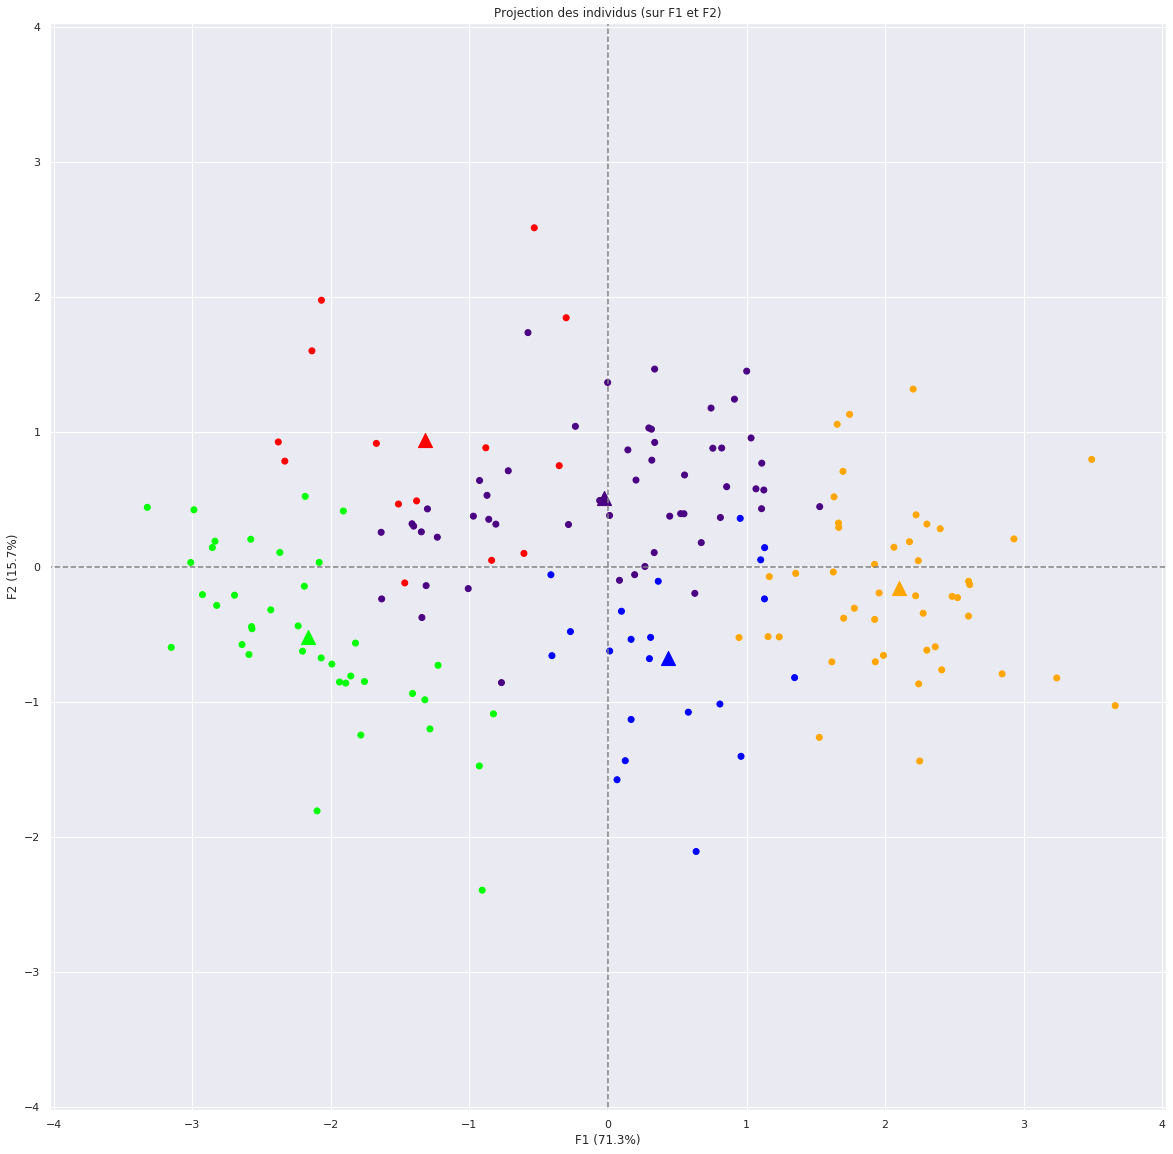

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

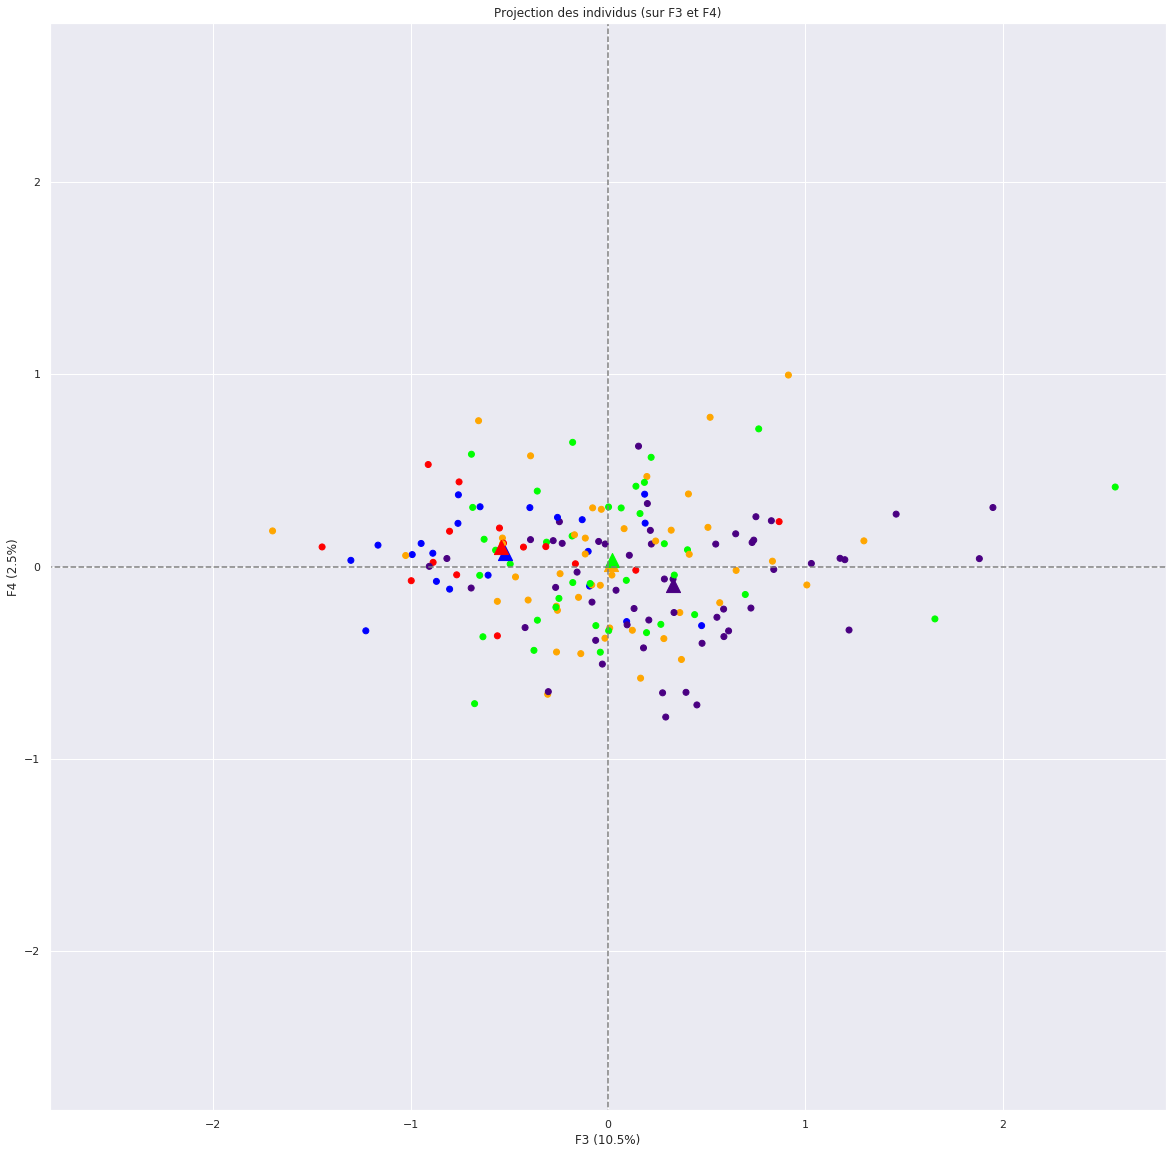

In [27]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], df['Clusters'])#, labels = np.array(names))

In [28]:
pca.components_

array([[-0.43284097,  0.52185509,  0.5465212 ,  0.49155929],
       [-0.77661419, -0.4489841 , -0.38363309,  0.21933838],
       [ 0.45204621, -0.37084989, -0.01736705,  0.81106287],
       [-0.07192581, -0.62333851,  0.74420334, -0.22899163]])

## Partie IV - Choix des Clusters

Nous allons choisir les clusters 1 - bleu - et 5 - mauve

Test de normalité pour le cluster 1 et la colonne Difference de population
stat=0.971, p=0.765


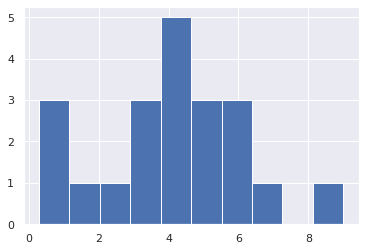

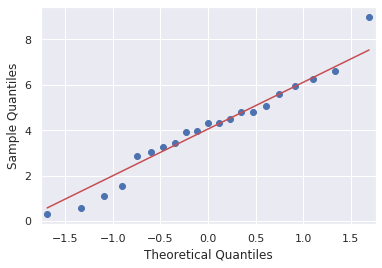

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Kcal
stat=0.962, p=0.560


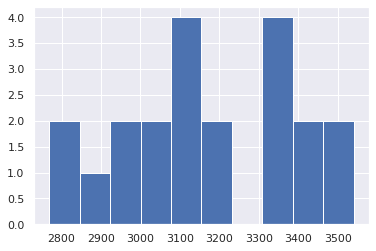

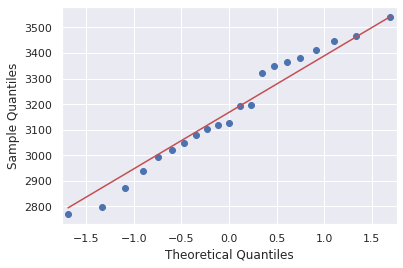

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Protéine
stat=0.986, p=0.983


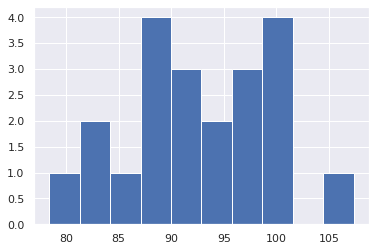

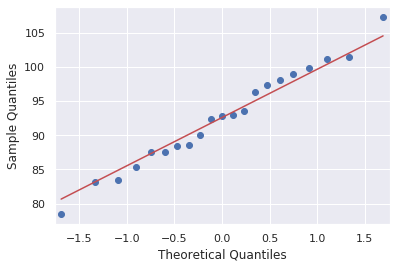

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Proportion Protéine Animale
stat=0.922, p=0.095


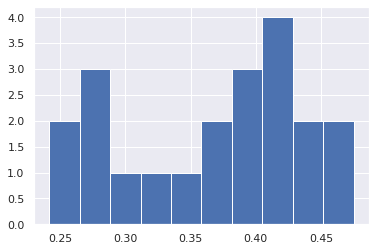

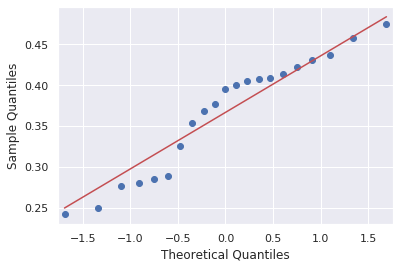

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Difference de population
stat=0.990, p=0.928


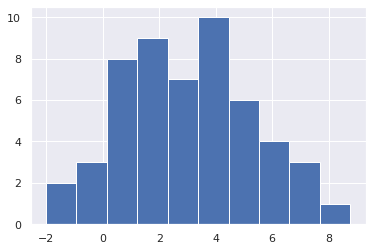

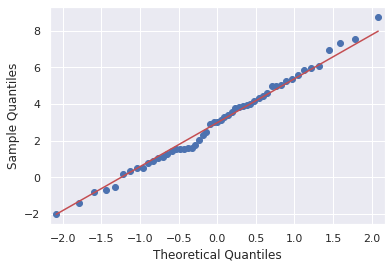

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Kcal
stat=0.970, p=0.207


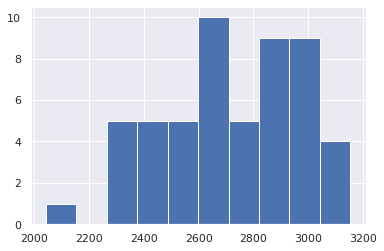

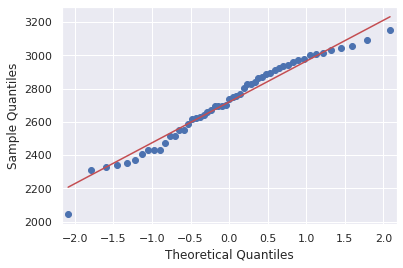

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Protéine
stat=0.964, p=0.110


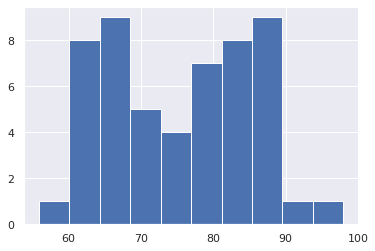

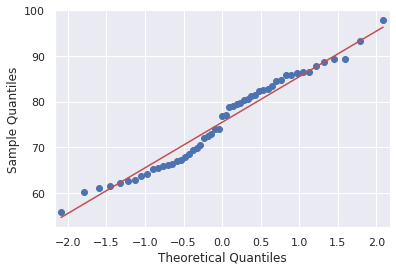

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Proportion Protéine Animale
stat=0.984, p=0.694


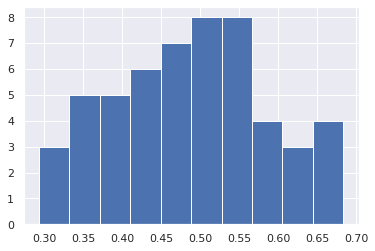

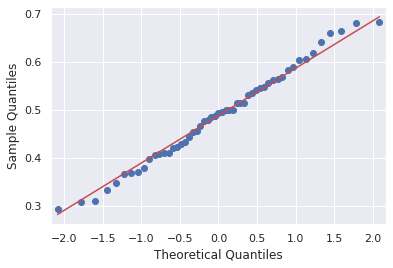

Probably Gaussian



In [29]:
for i in (1,5):
    for j in range(0, len(df.columns)-1):
        stat, p = shapiro(df[df['Clusters'] == i].iloc[:, j])
        print('Test de normalité pour le cluster', i, 'et la colonne', df.columns[j])
        print('stat=%.3f, p=%.3f' % (stat, p))
        plt.hist(df[df['Clusters'] == i].iloc[:, j])
        qqplot(df[df['Clusters'] == i].iloc[:, j], line='s')
        plt.show()
        if p > 0.05:
            print('Probably Gaussian\n')
        else:
            print('Probably not Gaussian\n')

In [30]:
df[df['Clusters'] == 1].iloc[:, 0]

1      4.324821
3      5.956869
7      6.599704
9      1.099569
12     3.450370
33     1.517768
41     0.285292
45     6.239909
47     2.877878
74     3.976640
85     5.576980
87     9.002737
101    3.903432
102    0.564650
119    4.797874
124    4.305836
132    4.505518
161    3.238221
162    5.060033
163    4.792111
168    3.051565
Name: Difference de population, dtype: float64

## Partie IV - Application de l'ACP sur le Dendrogramme

### Préparation des données - Centrage et Réduction

In [31]:
# préparation des données pour le clustering
X = pd.DataFrame(data = X_projected).values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# generate the linkage matrix
Z = linkage(X_scaled, 'ward')

### Cophenetic correlation

In [32]:
c, coph_dists = cophenet(Z, pdist(X_projected))
f"Cophenetic correlation : {c:0.2f}"

'Cophenetic correlation : 0.47'

### Courbe de Lorenz

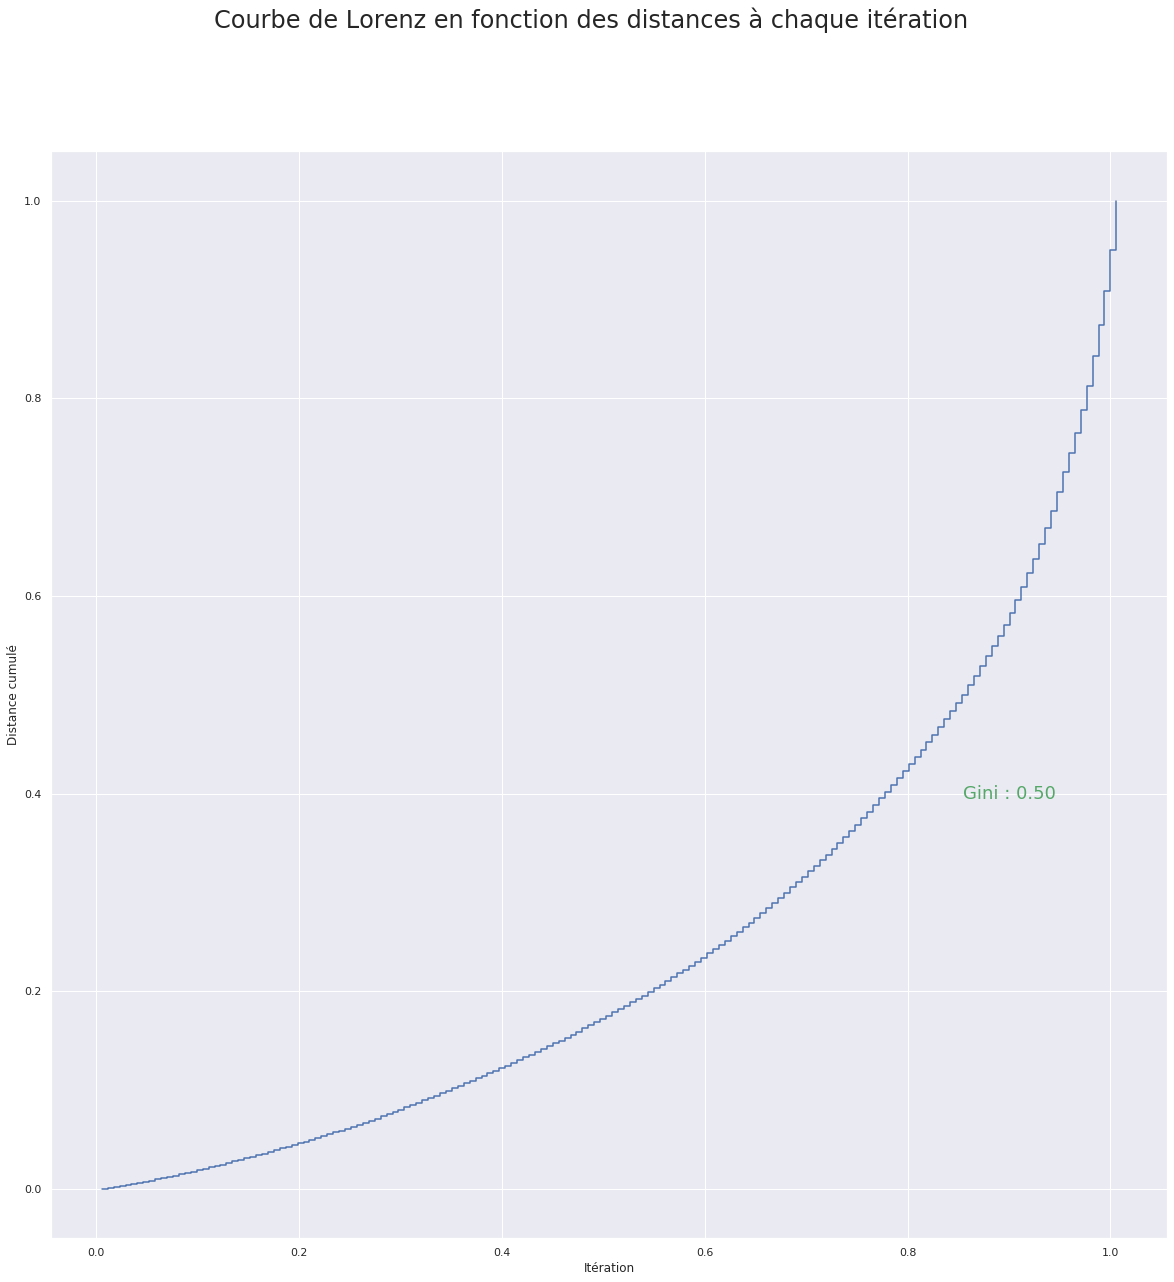

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

fig.suptitle("Courbe de Lorenz en fonction des distances à chaque itération", fontsize= _FONTSIZETITLE_)

lorenz, n, gini = OCR.lorenz(pd.DataFrame(data=Z[:,2]))
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes.plot(xaxis,lorenz,drawstyle='steps-post')
axes.text(0.9, 0.4, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes.set_xlabel('Itération')
axes.set_ylabel('Distance cumulé')

plt.show()

### Dendrogramme

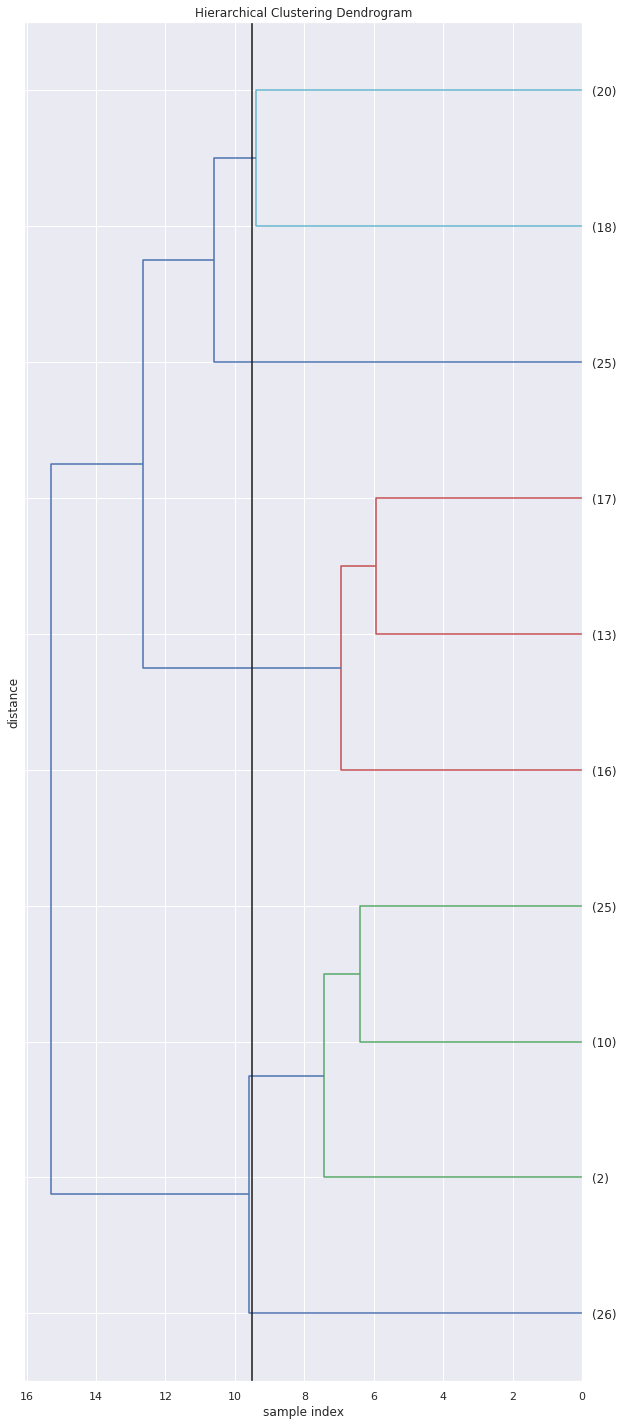

In [34]:
# Affichage du dendrogramme tronqué
plt.figure(figsize=(10,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=9.5, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 9.5,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

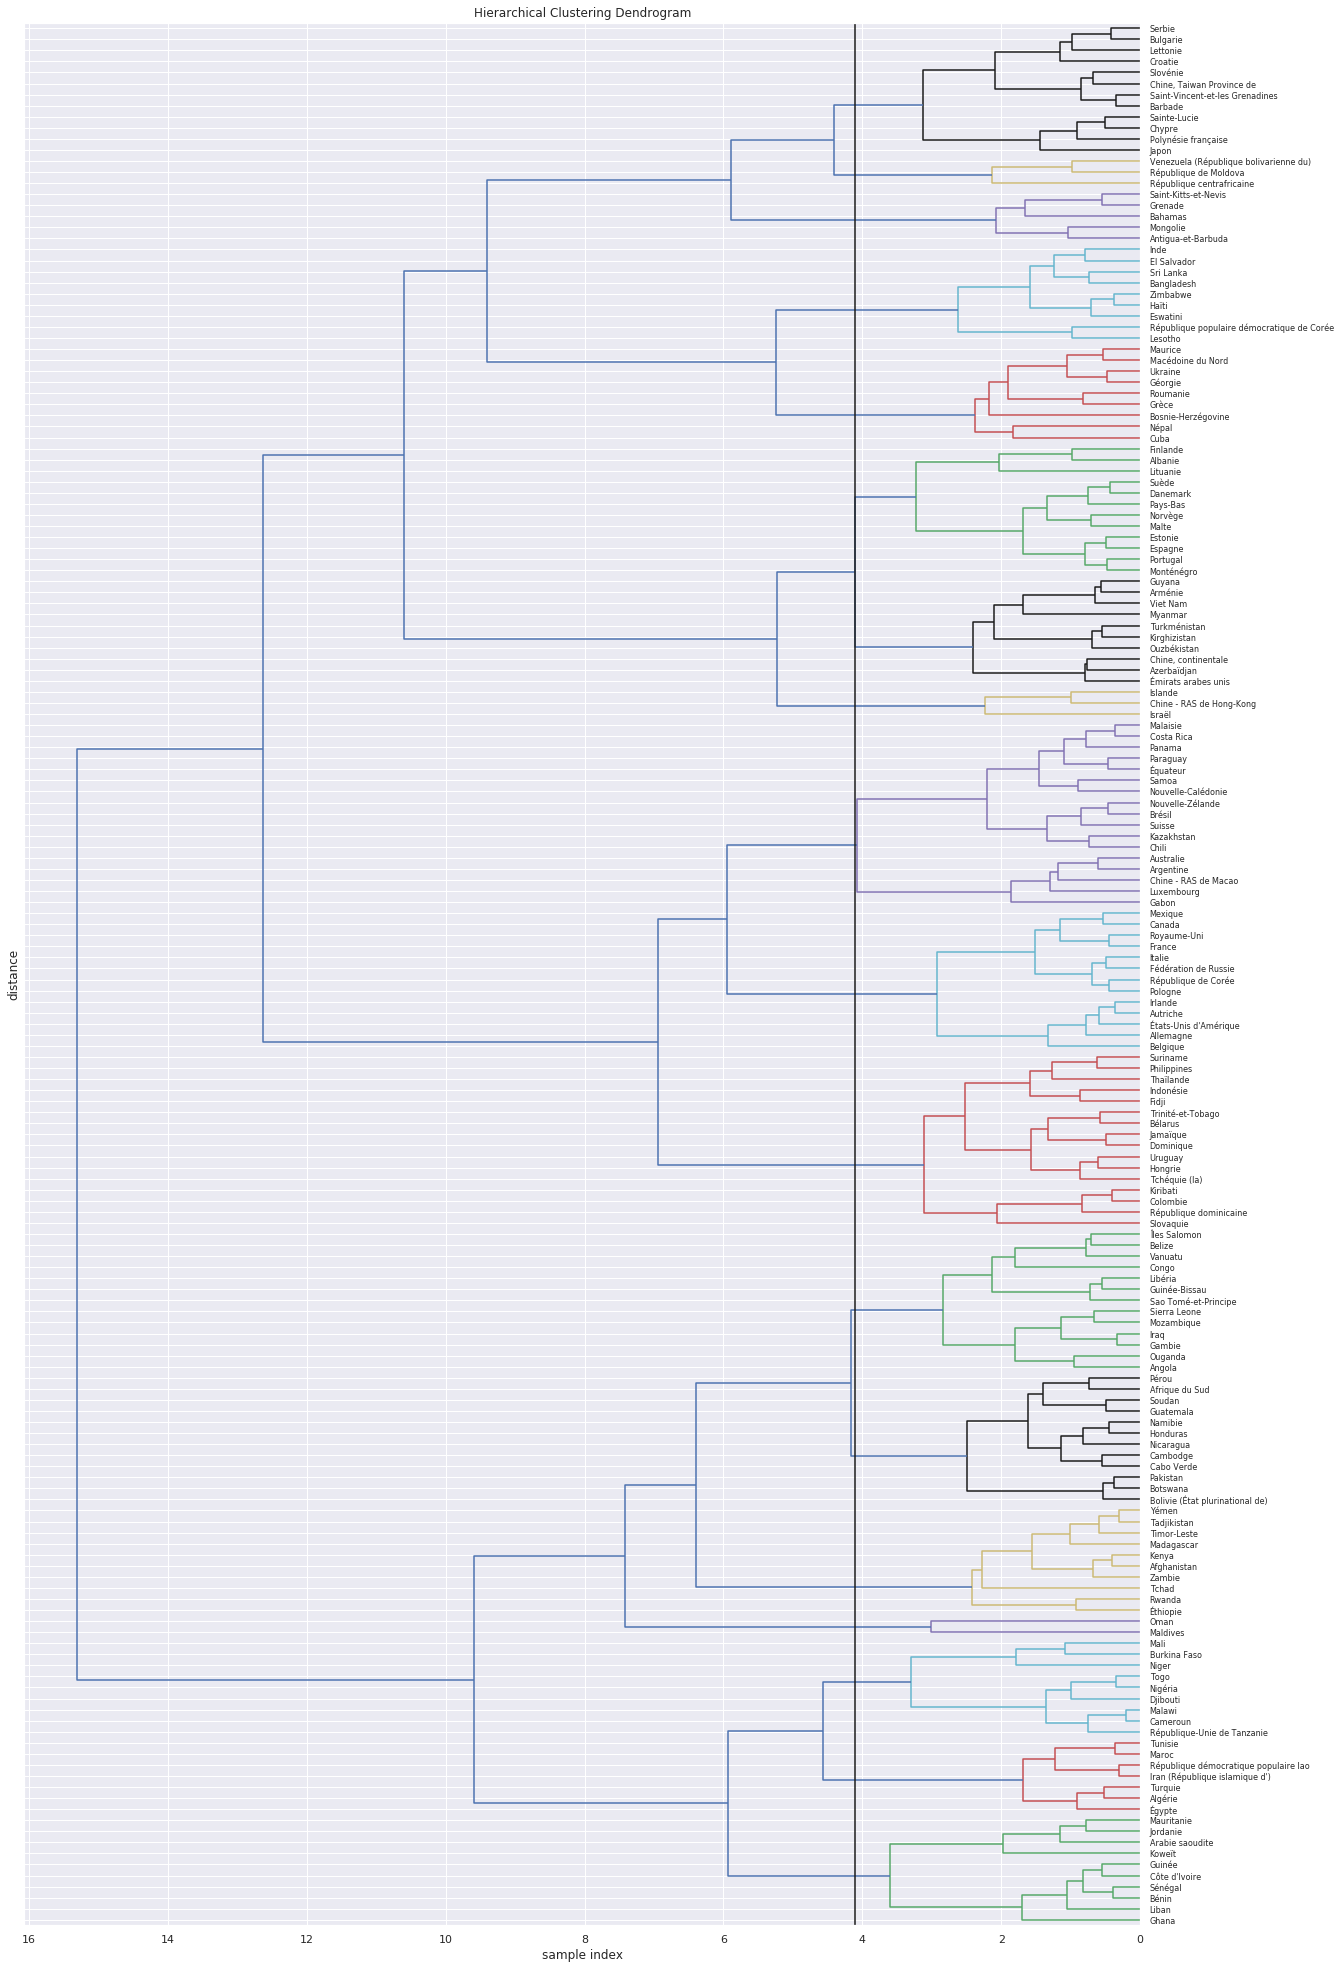

In [35]:
# Affichage du dendrogramme complet
plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=4.1, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 4.1,
    leaf_font_size = 8
)
plt.show()

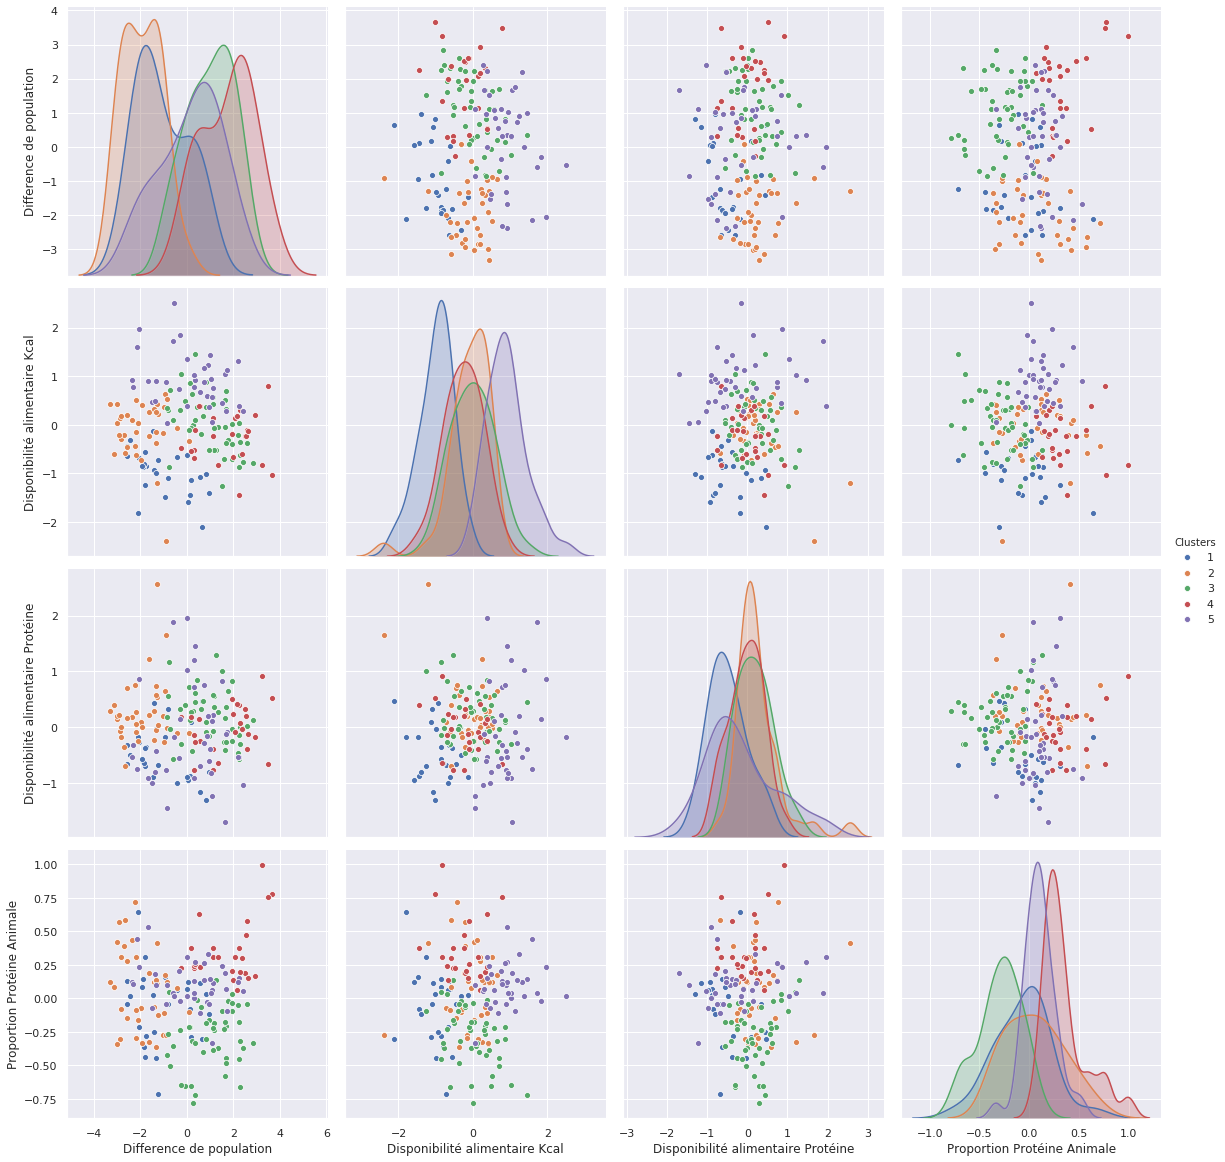

In [36]:
df = pd.DataFrame(data=X_projected)
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]
df['Clusters'] = fcluster(Z, 5, criterion='maxclust')
sns.pairplot(df, hue='Clusters', height=4)

In [37]:
X_projected

array([[-3.01093696e+00,  3.10047197e-02,  1.41797574e-01,
         4.18480666e-01],
       [ 9.75107388e-02, -3.29963159e-01, -9.30873791e-02,
        -1.00719083e-01],
       [ 2.60313711e+00, -1.07922799e-01, -3.91993489e-01,
         5.76589600e-01],
       [ 1.24926797e-01, -1.43719101e+00, -8.68968019e-01,
        -7.62517034e-02],
       [ 2.27503325e+00, -3.44635950e-01,  8.82180300e-03,
        -3.18697817e-01],
       [-2.56914553e+00, -4.59381611e-01,  6.95735204e-01,
        -1.44489190e-01],
       [ 3.37404521e-01,  9.20686146e-01,  1.45990841e+00,
         2.73358323e-01],
       [ 1.67081068e-01, -1.13166900e+00,  9.47881709e-02,
        -2.85304435e-01],
       [ 1.77821308e+00, -3.07739515e-01,  6.49262618e-01,
        -1.92380230e-02],
       [ 1.13076248e+00,  1.41278928e-01, -3.95518668e-01,
         3.07234966e-01],
       [ 1.92960493e+00, -7.04515576e-01,  8.33275884e-01,
         2.87575590e-02],
       [ 2.40887772e+00, -7.64291810e-01, -1.52776101e-02,
      

#### Calcul des vecteurs et des valeurs propre

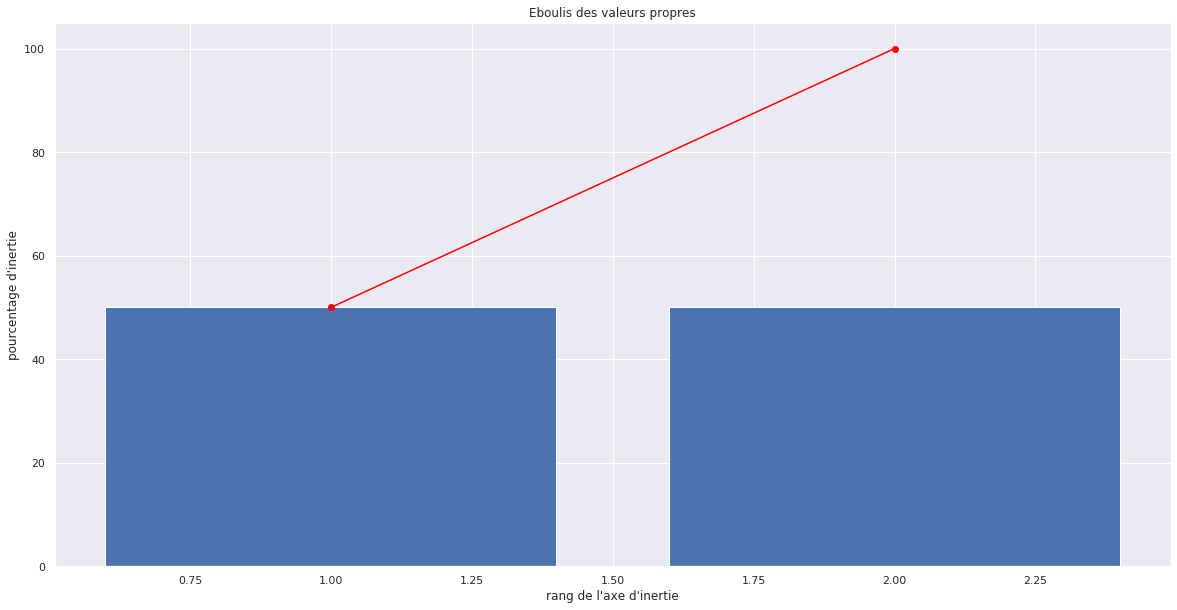

In [38]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[["Difference de population","Disponibilité alimentaire Kcal"]]

# préparation des données pour l'ACP
X = data_pca.values
names = df.index #pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

In [39]:
print(("Explained Variance: %s") % (pca.fit(X).explained_variance_ratio_))

Explained Variance: [0.81932779 0.18067221]


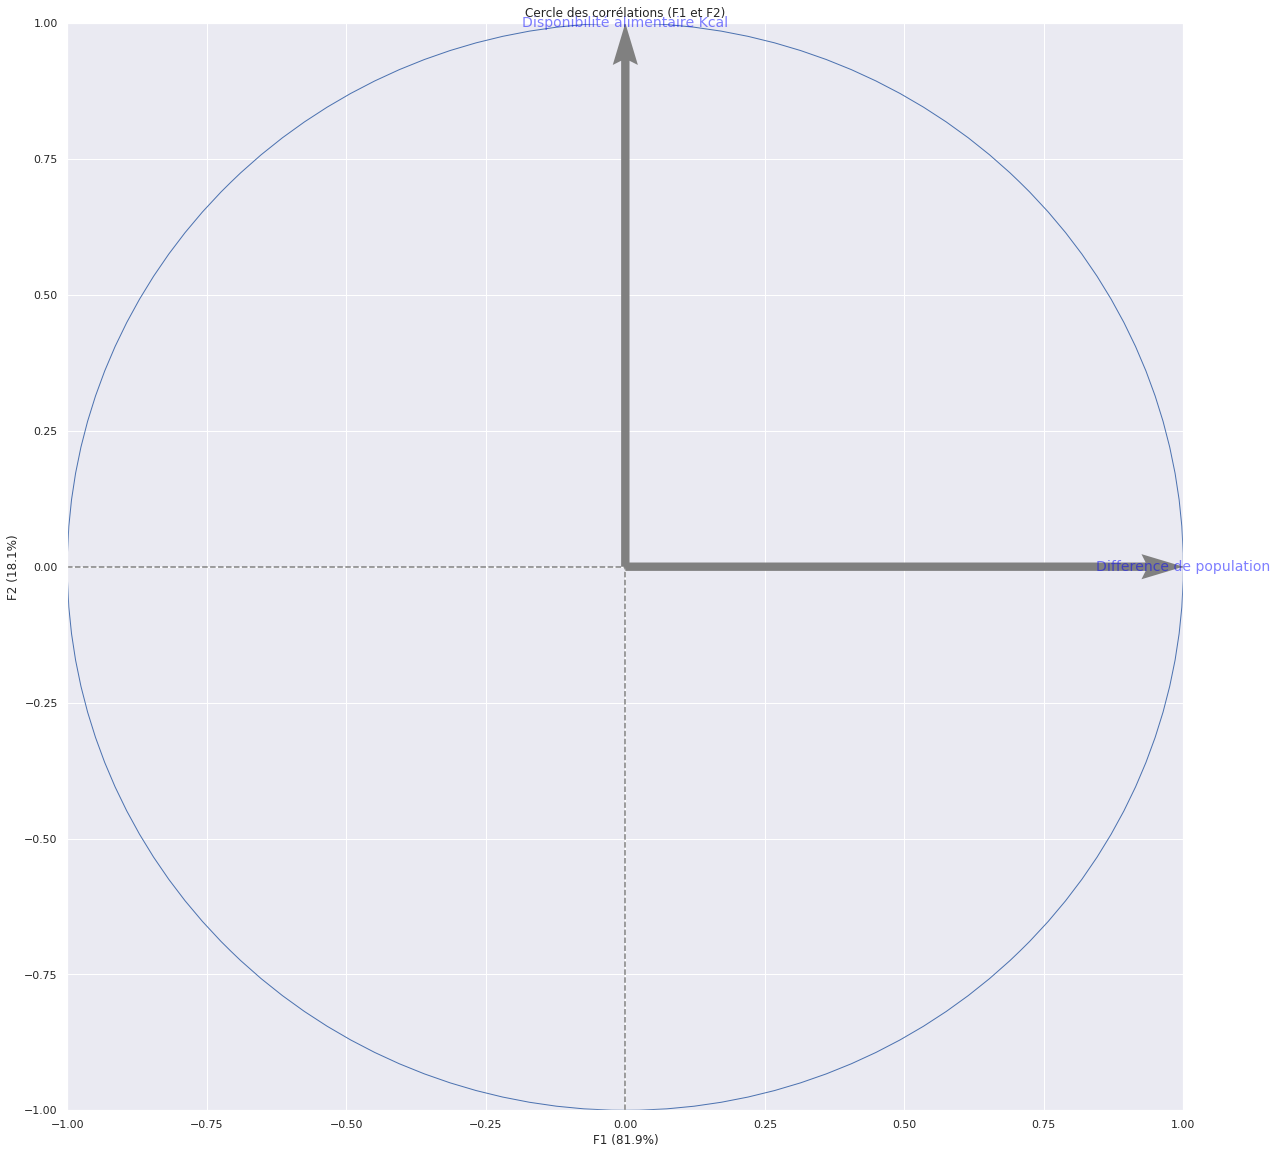

NameError: name 'clusters' is not defined

In [40]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], clusters)#, labels = np.array(names))

In [ ]:
covariance_matrix = np.cov(df.T)
print("Covariance matrix:\n", covariance_matrix)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

In [ ]:
eigen_vec_svd, _, _= np.linalg.svd(df.T)
eigen_vec_svd

In [ ]:
for val in eigen_values:
    print(val)

In [ ]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
sns.lineplot(x = [1,2,3], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

In [ ]:
projection_matrix = (eigen_vectors.T[:][:])[:2, :2].T
print("Projection matrix: \n", projection_matrix)

In [ ]:
X_pca = X.dot(projection_matrix)

In [ ]:
for clu in clusters:
    sns.scatterplot(X_pca[df['Clusters']==clusters, 0],
                   X_pca[df['Clusters']==clusters, 1])

In [ ]:
corrmat = np.abs(df[df['Clusters'] == 5].iloc[:,:2].corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmin = 0, vmax=1, square=True, annot = True)

In [ ]:
df.iloc[:,2]

In [ ]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
OCR.plot_dendrogram(Z, names)

In [ ]:
df = pd.DataFrame(data=X_scaled)
df.index = names
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]

g = sns.clustermap(df, z_score=0, cmap="vlag", figsize=(20, 50))

In [ ]:
df

In [ ]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
OCR.plot_dendrogram(Z, names)

In [ ]:
df = pd.DataFrame(data=X_scaled)
df.index = names
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]

df['clusters'] = fcluster(Z, 2, criterion='maxclust')
clusters = df.pop('clusters')

lut = dict(zip(clusters.unique(), "rbgym"))
row_colors = clusters.map(lut)

g = sns.clustermap(df, z_score=0, cmap="vlag", figsize=(20, 40), row_colors=row_colors)

In [ ]:
lut

### Découpage en 2 clusters

In [ ]:
Z

In [ ]:
clusters = fcluster(Z, 2, criterion='maxclust')

In [ ]:
clusters

In [ ]:
data['Clusters'] = clusters

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot((data['Difference de population'] - data['Difference de population'].mean()) / data.std()['Difference de population'], norm_hist = True, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot((data['Disponibilité alimentaire Kcal'] - data['Disponibilité alimentaire Kcal'].mean()) / data.std()['Disponibilité alimentaire Kcal'], norm_hist = True, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(data['Disponibilité alimentaire Protéine'], norm_hist = True, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(data['Proportion Protéine Animale'], norm_hist = True, ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Total", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
data.std()['Difference de population']

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

std = data.std()['Difference de population']
mean = data['Difference de population'].mean()

ax1 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Difference de population'] - mean) / std, ax=axes[0, 0]))
ax1 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Difference de population'] - mean) / std, ax=axes[0, 0]))

std = data.std()['Disponibilité alimentaire Kcal']
mean = data['Disponibilité alimentaire Kcal'].mean()

ax2 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Disponibilité alimentaire Kcal'] - mean) /std, ax=axes[0, 1]))
ax2 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Disponibilité alimentaire Kcal'] - mean) /std, ax=axes[0, 1]))

std = data.std()['Disponibilité alimentaire Protéine']
mean = data['Disponibilité alimentaire Protéine'].mean()

ax3 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Disponibilité alimentaire Protéine'] - mean) /std, ax=axes[1, 0]))
ax3 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Disponibilité alimentaire Protéine'] - mean) /std, ax=axes[1, 0]))

std = data.std()['Proportion Protéine Animale']
mean = data['Proportion Protéine Animale'].mean()

ax4 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Proportion Protéine Animale'] - mean) /std, ax=axes[1, 1]))
ax4 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Proportion Protéine Animale'] - mean) /std, ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Cluster 1", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

fig.suptitle('Répartition du prix en fonction de la catégorie du livre', fontsize= _FONTSIZETITLE_)
ax1 = sns.boxplot(x='Clusters', y='Difference de population', meanprops=meanprops, showmeans=True, data=data)

plt.xlabel("Clusters")
plt.ylabel("Difference de population")

sns.despine(left=True, bottom=True)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Difference de population'], ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Disponibilité alimentaire Kcal'], ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Disponibilité alimentaire Protéine'], ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Proportion Protéine Animale'], ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Cluster 2", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
data

### ACP

In [ ]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]]

# préparation des données pour l'ACP
X = data_pca.values
names = data.index #pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

In [ ]:
print(("Explained Variance: %s") % (pca.fit(X).explained_variance_ratio_))

In [ ]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], clusters)#, labels = np.array(names))

In [ ]:
corrmat = np.abs(data.corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmin = 0, vmax=1, square=True, annot = True)

In [ ]:
sns.pairplot(data, hue='Clusters')

In [ ]:
pcs

In [ ]:
X_projected = np.hstack((X_projected, np.atleast_2d(clusters).T))

In [ ]:
clusters

In [ ]:
meanD1 = []
meanD2 = []

In [ ]:
meanD1.append(X_projected[X_projected[ : , -1] == 2][:, 0].mean())

In [ ]:
meanD1

In [ ]:
for i in range(1,int(data.max().clusters)+1):
    meanD1.append(X_projected[X_projected[ : , -1] == i][:, 0].mean())
    meanD2.append(X_projected[X_projected[ : , -1] == i][:, 1].mean())

In [ ]:
X_projected[X_projected[ : , -1] == i][:, 0].mean()

In [ ]:
meanD1